In [1]:
import csv

from data_preparation import get_datasets, split_datasets, add_dangerous_data
from training_and_evaluation_functions import train_model, eval_perplexity, save_scores, backup_file
from visualization_functions import read_csv_into_matrix, plot_perplexity_matrix

c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# We want to display a matrix of perplexity scores for the two principal features (train_dataset, test_dataset)
base_model = "something"

# For now this order is the only way to know which test sets the perplexity scores are evaluated
# If it looks like there's one more category in the data, it's because it's the "dangerous data" which is
# a different category of dataset. This "dataset" takes the last index all the time
recipe_categories = ["all", "drinks", "bakery"]

saved_perplexity_file = "saved_perplexity.csv"

In [3]:
# Here we need to write the columns for the csv, they represent on which dataset the perplexity score is calculated on
# This is the X axis on the final matrix. Different from the X axis which is training dataset. 
# Needless to say when X = Y, the test and train data pick from the same category, but different recipes still.
csv_rows = ["recipe_train_dataset", "datetime"] + recipe_categories + ["bad"]

# Override the existing data
with open(saved_perplexity_file, 'w') as file:
    pass
        
with open(saved_perplexity_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=csv_rows)
    writer.writeheader()  # Write the column names


In [4]:
for i in range(4):
    save_scores("not_real_" + str(i), [i*13 + 3, i*10, i*11 + 20, i*12 + 2])

Matrix for Y_axis = 0    not_real_0
1    not_real_1
2    not_real_2
3    not_real_3
Name: recipe_train_dataset, dtype: object and X_axis = Index(['all', 'drinks', 'bakery', 'bad'], dtype='object')


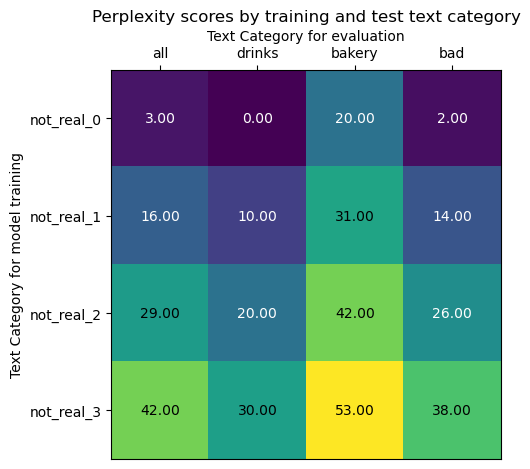

In [5]:
matrix, Y_axis, X_axis = read_csv_into_matrix(saved_perplexity_file)
plot_perplexity_matrix(matrix, Y_axis, X_axis)

In [ ]:
datasets = get_datasets(recipe_categories=recipe_categories)
train_datasets, test_datasets = split_datasets(datasets)

train_datasets = [None] + train_datasets
dataset_names = ["untrained"] + recipe_categories

test_datasets = add_dangerous_data(test_datasets)

for train_data, name in zip(train_datasets, dataset_names):
    print(f"OMG!!! training model on {name}")
    if train_data == None:
        trained_model = base_model
    else: 
        trained_model = train_model(base_model, train_datasets)
        
    scores = []
    for test_data in test_datasets:
        perp = eval_perplexity(trained_model, test_data)
        scores.append(perp)
    save_scores(name, scores)
    
backup_file(saved_perplexity_file, "saved_perplexities")

OMG!!! training model on untrained
